In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = "mouse_drug_data.csv"
ct_data = "clinicaltrial_data.csv"

mouse_data_df = pd.read_csv(mouse_data)
ct_data_df = pd.read_csv(ct_data)

In [4]:
# Combine the data into a single dataset
combined_data_df = pd.merge(ct_data_df, mouse_data_df, on="Mouse ID", how = "left") 

In [5]:
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_data = combined_data_df.groupby(["Drug", "Timepoint"])
mean_tumor_group = group_data["Tumor Volume (mm3)"].mean()
mean_tumor_group

# Convert to DataFrame
tumor_response_df = pd.DataFrame(mean_tumor_group).reset_index()

# Preview DataFrame
tumor_response_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_data_error = group_data["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_data_error_df = pd.DataFrame(tumor_data_error).reset_index()

# Preview DataFrame
tumor_data_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
data_munging = tumor_response_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)' )
# Preview that Reformatting worked"
data_munging

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


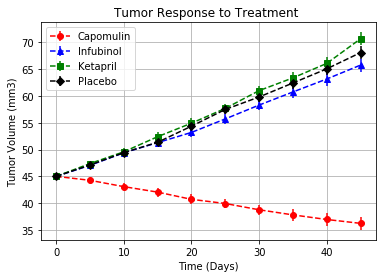

In [9]:
# Generate the Plot (with Error Bars)
capomulin_error = tumor_data_error_df.loc[tumor_data_error_df["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
infubinol_error = tumor_data_error_df.loc[tumor_data_error_df["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
ketapril_error = tumor_data_error_df.loc[tumor_data_error_df["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
placebo_error = tumor_data_error_df.loc[tumor_data_error_df["Drug"] == "Placebo", "Tumor Volume (mm3)"]

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.errorbar(Time, data_munging["Capomulin"], yerr = capomulin_error, label = "Capomulin", marker = "o", color = "red", linestyle = '--')
plt.errorbar(Time, data_munging["Infubinol"], yerr = capomulin_error, label = "Infubinol", marker = "^", color = "blue", linestyle = '--')
plt.errorbar(Time, data_munging["Ketapril"], yerr = capomulin_error, label = "Ketapril", marker = "s", color = "green", linestyle = '--')
plt.errorbar(Time, data_munging["Placebo"], yerr = capomulin_error, label = "Placebo", marker = "D", color = "black", linestyle = '--')
plt.legend()
plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig("images/tumor_response.png")

# Show the Figure
plt.show()

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
group_data = combined_data_df.groupby(["Drug", "Timepoint"])
mesite_mean_data = group_data["Metastatic Sites"].mean()

# Convert to DataFrame
mesite_mean_df = pd.DataFrame(mesite_mean_data).reset_index()

# Preview DataFrame
mesite_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [23]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint

mesite_mean_data_error = group_data["Metastatic Sites"].sem()

# Convert to DataFrame
mesite_mean_error_df = pd.DataFrame(mesite_mean_data_error).reset_index()

# Preview DataFrame
mesite_mean_error_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [24]:
# Minor Data Munging to Re-Format the Data Frames

mungled_mesite_data = mesite_mean_df.pivot(index = 'Timepoint', columns ='Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked
mungled_mesite_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


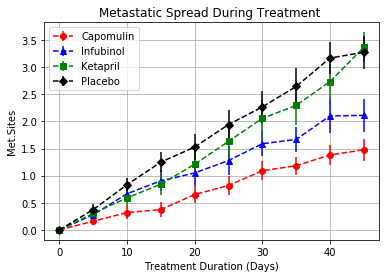

In [28]:
capomulin_error = mesite_mean_error_df.loc[mesite_mean_error_df["Drug"] == "Capomulin", "Metastatic Sites"]
infubinol_error = mesite_mean_error_df.loc[mesite_mean_error_df["Drug"] == "Infubinol", "Metastatic Sites"]
ketapril_error = mesite_mean_error_df.loc[mesite_mean_error_df["Drug"] == "Ketapril", "Metastatic Sites"]
placebo_error = mesite_mean_error_df.loc[mesite_mean_error_df["Drug"] == "Placebo", "Metastatic Sites"]

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.errorbar(Time, mungled_mesite_data["Capomulin"], yerr = capomulin_error, label = "Capomulin", marker = "o", color = "red", linestyle = '--')
plt.errorbar(Time, mungled_mesite_data["Infubinol"], yerr = infubinol_error, label= "Infubinol", marker = "^", color ="blue", linestyle ='--')
plt.errorbar(Time, mungled_mesite_data["Ketapril"], yerr = ketapril_error, label = "Ketapril", marker = "s", color ="green", linestyle ='--')
plt.errorbar(Time, mungled_mesite_data["Placebo"], yerr = placebo_error, label = "Placebo", marker = "D", color ="black", linestyle ='--')

plt.legend()
plt.title("Metastatic Spread During Treatment ")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met.Sites")
plt.grid()

# Save the Figure
plt.savefig("Images/Metsite_Response.png")

# Show the Figure
plt.show()

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group_data = combined_data_df.groupby(["Drug", "Timepoint"])
mice_count = group_data["Mouse ID"].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count).reset_index()

# Preview DataFrame
mice_count_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
munging_mice_count = mice_count_df.pivot(index = 'Timepoint', columns ='Drug', values = 'Mouse ID' )

# Preview the Data Frame
munging_mice_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


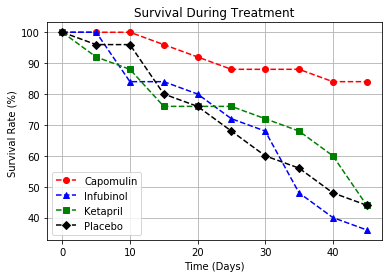

In [16]:
# Generate the Plot (Accounting for percentages)
plt.plot(Time, (munging_mice_count["Capomulin"]/25)*100 , label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.plot(Time, (munging_mice_count["Infubinol"]/25)*100 , label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.plot(Time, (munging_mice_count["Ketapril"]/25)*100 , label= "Ketapril", marker= "s", color="green", linestyle='--')
plt.plot(Time, (munging_mice_count["Placebo"]/25)*100 , label= "Placebo", marker= "D", color="black", linestyle='--')

plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%) ")
plt.grid()

# Save the Figure
plt.savefig("Images/Survival_Rate.png")
# Show the Figure
plt.show()

In [17]:
# Calculate the percent changes for each drug
first_tumor_volume = 45
percent_change = ((data_munging.loc[45, :] - first_tumor_volume)/first_tumor_volume)*100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [18]:
# Store all Relevant Percent Changes into a Tuple
tuple_percent_change = tuple(zip(percent_change.index, percent_change))
tuple_percent_change_list = list(tuple_percent_change)
tuple_percent_change_list


[('Capomulin', -19.475302667894173),
 ('Ceftamin', 42.516491855897414),
 ('Infubinol', 46.12347172785184),
 ('Ketapril', 57.028794686606076),
 ('Naftisol', 53.92334713476923),
 ('Placebo', 51.29796048315153),
 ('Propriva', 47.24117486320634),
 ('Ramicane', -22.320900462766673),
 ('Stelasyn', 52.08513428789896),
 ('Zoniferol', 46.57975086509525)]

In [ ]:
# Splice the data between passing and failing drugs
